### (Markov chains)

import modules

In [166]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

In [167]:
CFB2016_scores = genfromtxt('CFB2016_scores.csv', delimiter=',')
CFB2016_scores.shape

(4197, 4)

In [168]:
TeamNames=[]
fh = open('TeamNames.txt','r')
for i,line in enumerate(fh):
    TeamNames.append(line.strip())
TeamNames=np.array(TeamNames)
len(TeamNames)    

760

Constructing M matrix of 760 X 760 intitialized with zeroes

In [169]:
M=np.zeros([760,760])
M.shape

(760, 760)

In [170]:
for i in range(CFB2016_scores.shape[0]):
    if CFB2016_scores[i][1].astype(int)>CFB2016_scores[i][3].astype(int):
#         print('a')
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 1 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 1 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 0 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 0 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
    
    elif CFB2016_scores[i][1].astype(int)<CFB2016_scores[i][3].astype(int): 
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 1 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 1 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 0 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 0 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        
    else:
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 1 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][0].astype(int)-1] + 1 + (CFB2016_scores[i][1]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][2].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 1 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
        M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1]=M[CFB2016_scores[i][0].astype(int)-1][CFB2016_scores[i][2].astype(int)-1] + 1 + (CFB2016_scores[i][3]/(CFB2016_scores[i][1]+CFB2016_scores[i][3]))
    

Normalize M matrix

In [171]:
row_sums = M.sum(axis=1)
M_norm =  M / row_sums[:, np.newaxis]
M_norm.shape

(760, 760)

Set w0 to the uniform distribution

In [172]:
w0 = np.random.uniform(0,1,[1,760])
w0.shape

(1, 760)

In [173]:
#w0.fill(0.5)

In [174]:
# w=np.zeros([11,760])
# w.shape

In [175]:
def t_val(T):
    w=np.zeros([T+1,760])
    w[0]=w0
    for t in range(T):
        w[t+1]=np.matmul(w[t],M_norm)
        w[t+1]=w[t+1]/np.sum(w[t+1])
    ind=w[t+1].argsort()[-25:][::-1]
#     return w[t+1],ind
    d = []
    for i in range(0,len(ind)):
        d.append({'Team': TeamNames[ind[i]], 'w': w[t+1][ind[i]]})

    d=pd.DataFrame(d)
    return d

In [190]:
print("Top 25 Teams for t=10")
print(t_val(10))


Top 25 Teams for t=10
                  Team         w
0   Mary Hardin-Baylor  0.016804
1       NW Missouri St  0.014733
2              Alabama  0.012327
3              Clemson  0.010657
4           UW-Oshkosh  0.010499
5        UW-Whitewater  0.008593
6            St Thomas  0.008455
7        St Francis IN  0.008322
8          Mount Union  0.007629
9        James Madison  0.007420
10       California PA  0.007087
11        John Carroll  0.007072
12     Grand Valley St  0.006986
13             Harding  0.006940
14            Shepherd  0.006933
15           Reinhardt  0.006757
16               Baker  0.006670
17     North Dakota St  0.006258
18       North Alabama  0.006008
19              Alfred  0.006006
20           Ferris St  0.005968
21       North Central  0.005651
22             Wheaton  0.005579
23           Marian IN  0.005496
24                 Coe  0.005431


In [191]:
print("Top 25 Teams for t=100")
print(t_val(100))

Top 25 Teams for t=100
                  Team         w
0       NW Missouri St  0.040354
1              Alabama  0.033350
2              Clemson  0.032970
3   Mary Hardin-Baylor  0.030660
4           UW-Oshkosh  0.016655
5        UW-Whitewater  0.012035
6      Grand Valley St  0.010685
7           Florida St  0.010439
8         John Carroll  0.010060
9           Ohio State  0.009935
10           Ferris St  0.009835
11           St Thomas  0.009274
12          Washington  0.008886
13       Virginia Tech  0.008784
14         Mount Union  0.008553
15          Emporia St  0.008459
16            Michigan  0.008194
17          Pittsburgh  0.008072
18            Oklahoma  0.008038
19          Penn State  0.007565
20           Wisconsin  0.007286
21          Louisville  0.006951
22            Miami FL  0.006901
23      North Carolina  0.006541
24             Ashland  0.006471


In [192]:
print("Top 25 Teams for t=1000")
print(t_val(1000))

Top 25 Teams for t=1000
                Team         w
0            Alabama  0.060891
1            Clemson  0.060579
2     NW Missouri St  0.030782
3         Florida St  0.018867
4         Ohio State  0.018034
5         Washington  0.015935
6      Virginia Tech  0.015869
7           Michigan  0.014869
8         Pittsburgh  0.014693
9           Oklahoma  0.014431
10        Penn State  0.013711
11         Wisconsin  0.013125
12        Louisville  0.012649
13          Miami FL  0.012456
14      Southern Cal  0.011622
15    North Carolina  0.011451
16       Oklahoma St  0.011324
17           Florida  0.011283
18         Tennessee  0.010844
19            Auburn  0.010843
20      Georgia Tech  0.010007
21               LSU  0.009575
22  Western Michigan  0.009548
23          Stanford  0.009538
24     James Madison  0.008708


In [193]:
print("Top 25 Teams for t=10000")
print(t_val(10000))

Top 25 Teams for t=10000
                Team         w
0            Alabama  0.067493
1            Clemson  0.067193
2         Florida St  0.020901
3         Ohio State  0.019984
4         Washington  0.017634
5      Virginia Tech  0.017579
6           Michigan  0.016477
7     NW Missouri St  0.016393
8         Pittsburgh  0.016286
9           Oklahoma  0.015972
10        Penn State  0.015192
11         Wisconsin  0.014534
12        Louisville  0.014021
13          Miami FL  0.013796
14      Southern Cal  0.012870
15    North Carolina  0.012652
16       Oklahoma St  0.012527
17           Florida  0.012495
18         Tennessee  0.012011
19            Auburn  0.012011
20      Georgia Tech  0.011085
21               LSU  0.010575
22  Western Michigan  0.010570
23          Stanford  0.010557
24         Texas A&M  0.009553


##### (b) Plot ∥wt −w∞∥1 as a function of t for t=1,...,10000.

In [180]:
import scipy.sparse.linalg
x,y=sparse.linalg.eigs(M_norm.T,k=1,sigma=1.0)

In [181]:
y=y/np.sum(y)

In [182]:
T=10000
w=np.zeros([T+1,760])
w[0]=w0
for t in range(T):
    w[t+1]=np.matmul(w[t],M_norm)
    w[t+1]=w[t+1]/np.sum(w[t+1])

In [183]:
diff=[]
for i in range(1,10000):
    diff.append(np.linalg.norm(w[i].reshape([760,1])-y,ord=1))



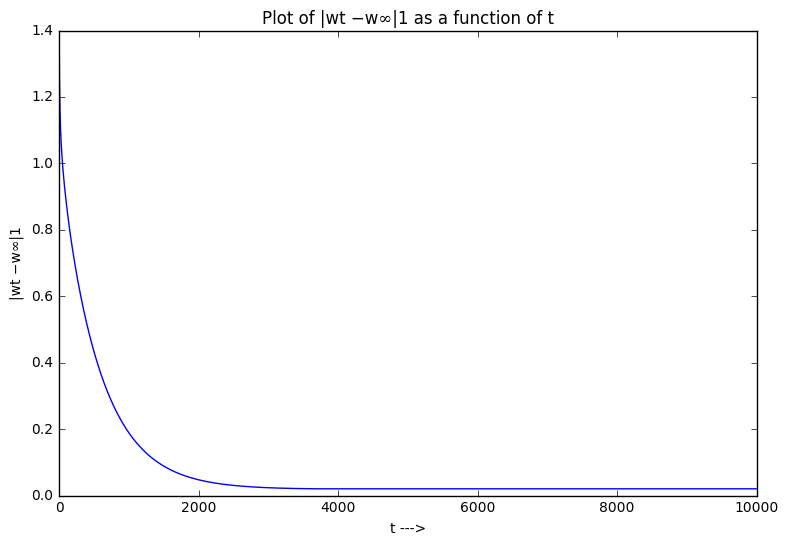

In [188]:
x_axis2 = np.arange(1, 10000)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# for i in range(1,10):
    
plt.plot(x_axis2,diff)

plt.title("Plot of |wt −w∞|1 as a function of t")
plt.xlabel("t --->")
plt.ylabel("|wt −w∞|1")
plt.show()